# CNN

Convolutional neural network, or convnet, for processing data that has a known `grid-like` topology like `time-series` (1D) data or `images` (2D)

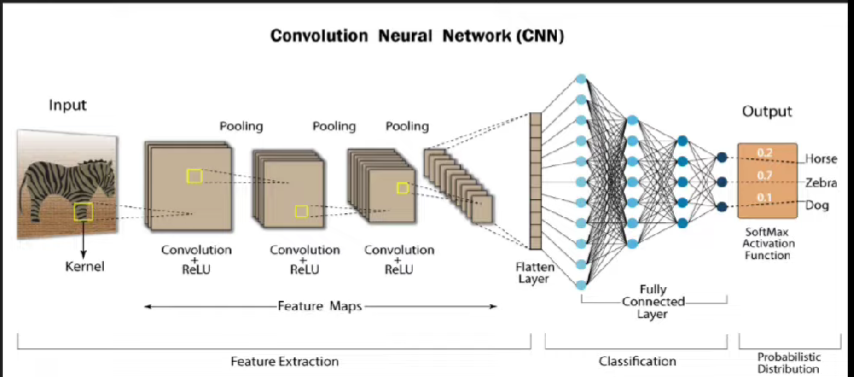

In `ANN` we use matrix-multiplication, but here we use convolution

* CNN is inspired from our `visual cortex`.

Why Not ANN on image data?

1. High computation cost
* Bcoz, we need to convert the 2D image to N* N pixel ie. flatten in 1 D, and then feed to the neural network

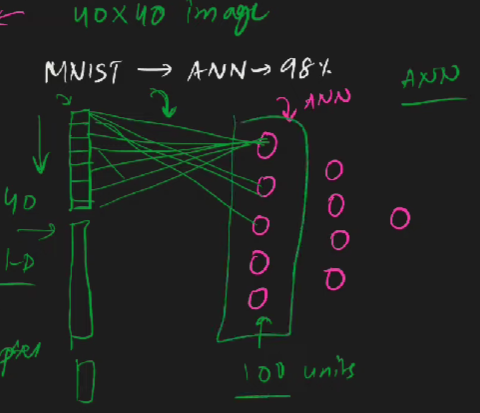



* For larger image, lots and lots weight have to be trained, infinite connections wiill be there.
2. Overfitting, since each and every feature in image will be tried to be captured by N*N input layers.
3. Loss of imp feature, due to conversion to 1D from 2D.


Convolution is basically a `filter`, as we find a feature, the neuron gets activated and aggregate to give output to next layer neurons.

* FIrst layer detect `edges`
* Next layer detect some more complex and so one.

Layers in `CNN`.
* Convolution
* Pooling
* Fully connected

# CNN V/s Visual Cortex

Fnctioning of cnn is based on our visual Cortex
* Here each cell is responsible to detect a particular type of pattern, like horizontal edge, vertical, dots etc.

# Convolution Operation

* edge detection:- edge is just the change in intensity of pixel

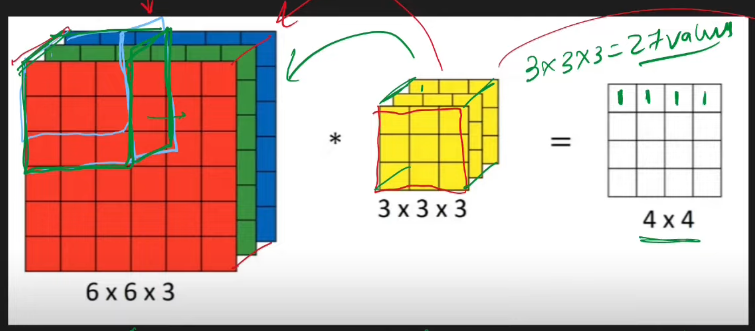

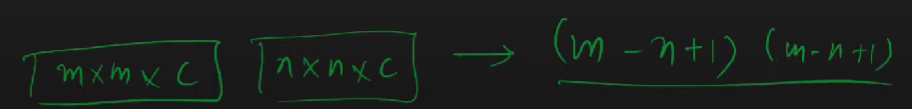

## Padding and Strides

**Need of padding**
1. size of output decrease
2. pixel at extreme have less say than the middle pixels.

* Padding adds new pixels around the edges of image pixels.

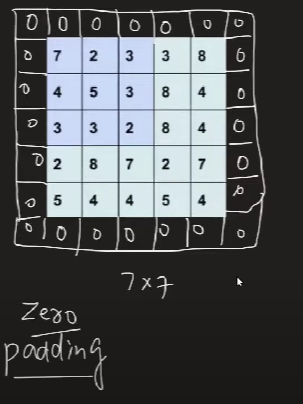


** Strides **
* it is the movement filter on the image data.
* If stride = (1,1), we're moving 1 on left and at end of 1st row 1 on bottom
* We can change the stride: (2, 3), 2 boxes on left and at end 3 boxes at bottom

Reasons to use `strides`:
* when we want high level features only. (use stride higher)
* For computation, faster.

## Pooling Layer

* Problem with convolution operation:
* - memory
  - translation variance:- same feature detected at different places are different
  - i.e, features are location independent.


* Keeping the `dominant` feature

***Advantage of pooling***
* feature reduced:- since we are pooling max out of a group of pixel.
* Translation invariance:- identify the feature, irrespective of its location.
* Enhanced features:-
* No need of training:- just an aggregate operation.

**Types of pooling**
1. max, avg, global pooling
2. Global max, global avg pooling
3. Global max:- gives the max of all the features ( a scaler value)
4. Global max pooling is used at last while passing the flattend to fullly connnected layer, in order to reduce the overfitting

***Disadvantage***
1. image segementation, not used.
2. loss of information as features reduced.

### Basic CNN Architecture:
* input: - (Conv1 + pooling) + (Conv1 + pooling) ... + flattened output --> Fully connected network ---> sigmoid/softmax outptu


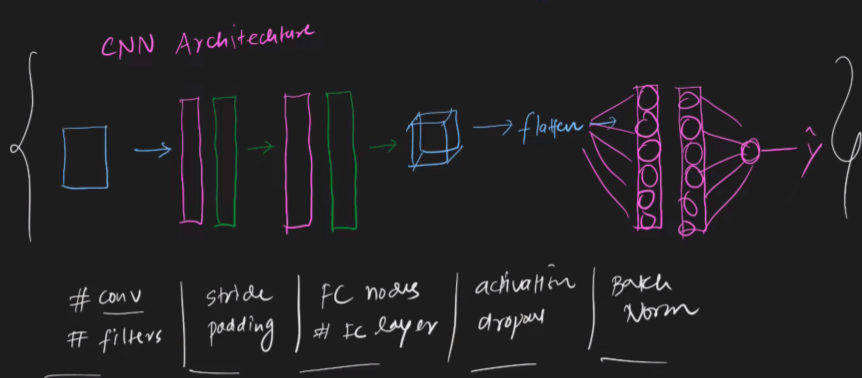

# LeNet-5  Architecture

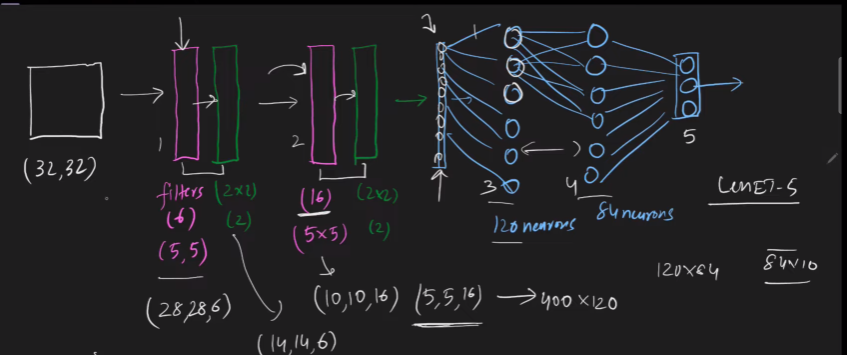
****

* layer 1:- conv1 + avg pooling
* layer 2:- conv2 + avg pooling
* layer 3:- fully connected layer
* layer 4:- fully connected layer
* layer 5:- softmax activation ( for digits recongnition)


### Code implementation of `lenet-5`

In [2]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


In [25]:
X_train[0].shape

(28, 28)

# LeNet Architecture

In [15]:
model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), padding = 'valid', activation = 'tanh', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(16, kernel_size=(5,5), padding = 'valid', activation = 'tanh'))
model.add(AveragePooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten()) 

model.add(Dense(120, activation = 'tanh'))
model.add(Dense(84, activation = 'tanh'))

model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9099 - loss: 0.3137 - val_accuracy: 0.9774 - val_loss: 0.0656
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0731 - val_accuracy: 0.9855 - val_loss: 0.0454
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9856 - val_loss: 0.0468
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9866 - loss: 0.0419 - val_accuracy: 0.9858 - val_loss: 0.0460
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9840 - val_loss: 0.0489
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9874 - val_loss: 0.0384
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9880 - val_loss: 0.0370
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0217 -

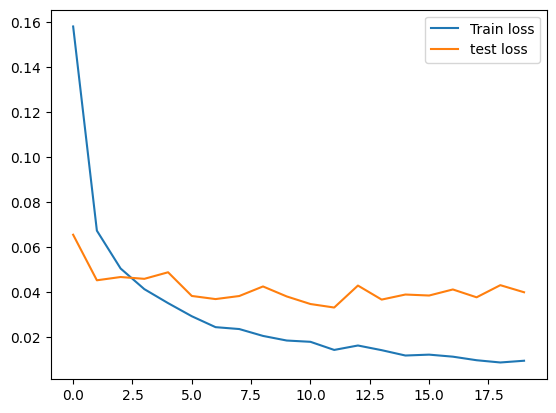

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.legend()

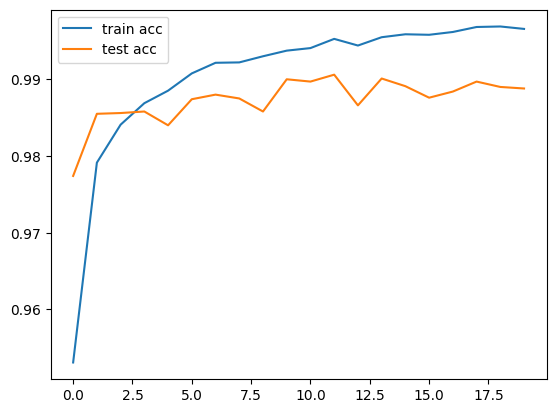

In [21]:
# checking the accuracy:
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'test acc')
plt.legend()

# Comparing CNN V/s ANN

#### Similarity:
The basic principle of ann and cnn are same,
In `ann` we dot product the weights and input features, in `cnn` we do the same but using a `plate` i.e, move
with `2-dimesions`.

In `cnn`, we move in a way to capture `2d` info. but here also we multiply(or operate) on each input item with our `conv` layer each unit.

Roughly, `filter` of `cnn` are same as `node` of `ann`

## Q. what is the no of learnable parameters in the following feature map.

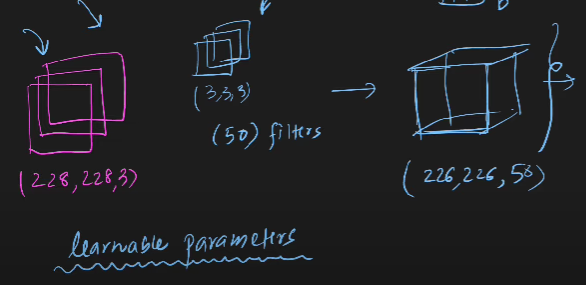

Ans:- (3*3*3) * 50 = 1350 -> 1350 + 50 (biases) = 1400 

If we increase the input dimension of the image, the parameters remain the `same`.

Advantage of `CNN`:- 
* Learnable parameters don't depend on the size of input data.
* simply depend on the `filter size` and `no of filters` we are using.

#### So what we gained from this::::

### Summary

* Is `CNN` same or different from `ANN`. Yes/No. Why.
* Why we can't use `ANN` architecture to train `images` or similar data.
* How at core label `ANN` is similar to `CNN'.
* What is the `learnable parameters` in CNN, and how is it different from `ANN`.
* 

# BackPropagation in CNN

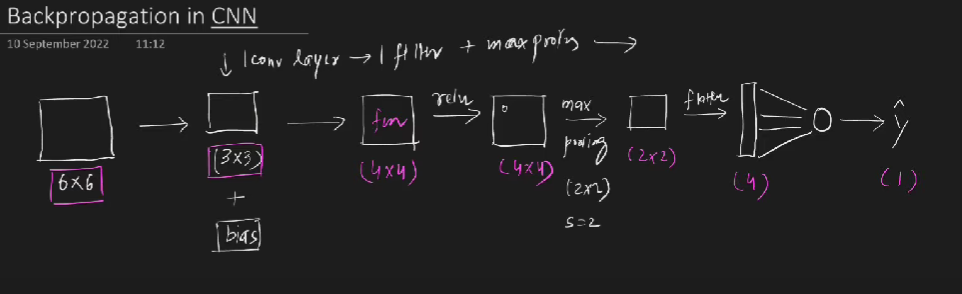


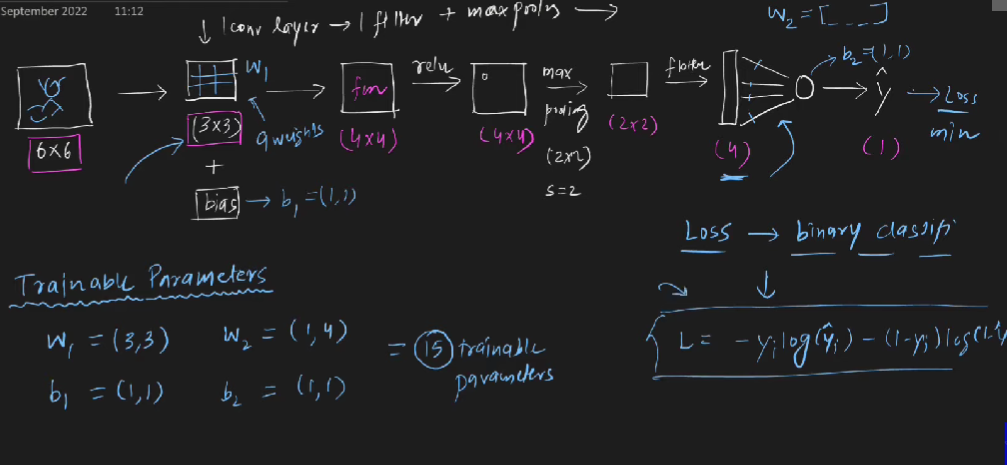


 Logical diagram of cnn::

 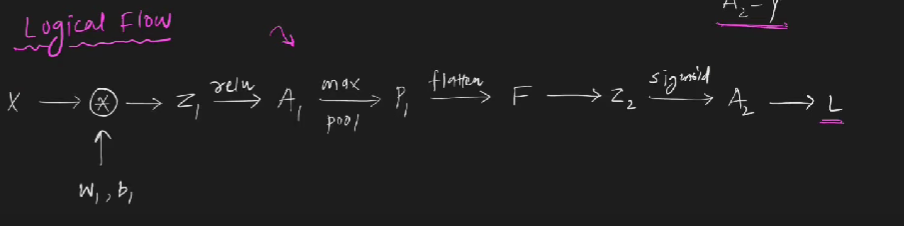

 Forward Propagation:

 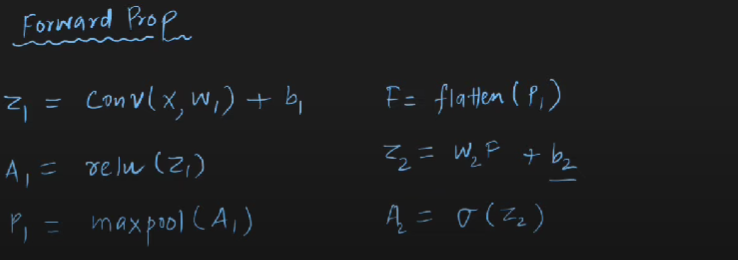

 * We can understand it as backpropagation in `ann` at last + `cnn` in initial

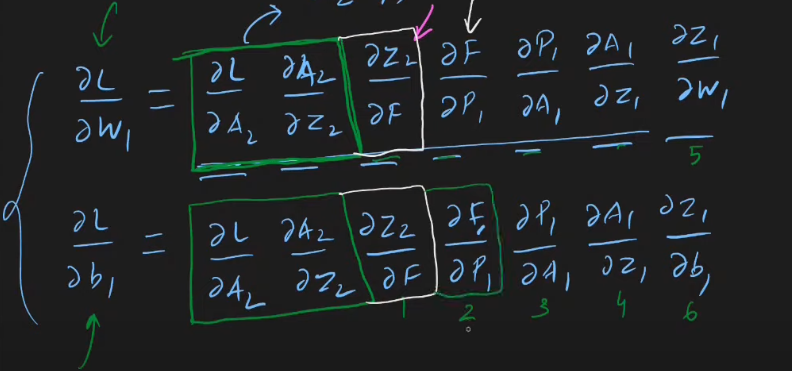

* we can easily find the $dL$/${dz_2}$ from the `ann` part.
* For $dL$/$dw_1$, we can multiply $dL$/${dz_2}$ with rest of the remaining parts.
* i.e, for `F` we need to again reshape it from flatten
* For P1 --> we'll just put the max no in the matrix and rest `0'
* FOr $dZ_1$/$dA_1$, we can take `1/0` since it is relu function.
* For$dZ$/$dW_1$, will give `X`.

So in summary, we have :

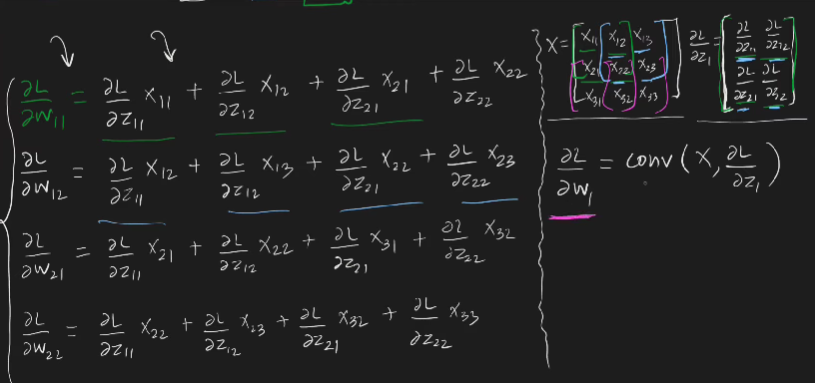

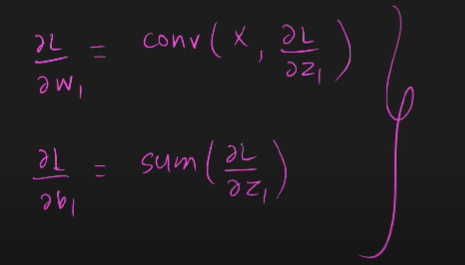

# DAta Augmentation.

* To solve availability of data problem.
* creating multiple images from a given image.
* apply on train data only, not on test images.
* Newly generated images are only used for training not the original data from which we generated new pictures.


# Pretrained model in CNN

* `Link to notebook:` - https://www.kaggle.com/code/prakashraushan/using-pretrained-models-cnn/edit

* why do we use pre-trained model.

1. Data Hungry ---> image data, lots of `labelled` data.
2. Time processing -> model training

So rather than using our own model from `scratch`, we can use `pre-trained` model.

# ImageNET Dataset:

* What
1. 15 Million labelled images


Won `LSVRC (Large Scale Visual Recognition Challenge)`

# AlexNET:

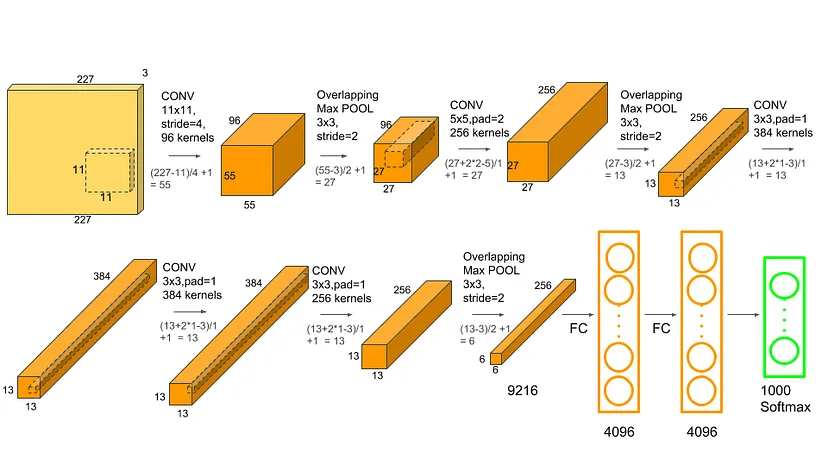

* 8 layers
* 5 convolution layers
* 3 fully connected layers.
* Relu activation, with dropout layers

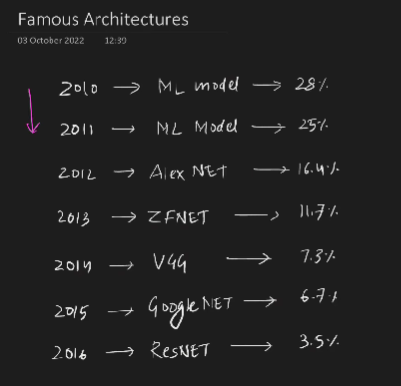

## idea of pretrained models.

* no training, directly implementable.

# What does a CNN See ?

link to the kaggle notebook:- https://www.kaggle.com/code/prakashraushan/layer-wise-visualization-of-a-cnn-output/edit
